In [1]:
from keras.datasets import boston_housing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=10)

In [3]:
x_train.shape

(404, 13)

In [4]:
x_test.shape

(102, 13)

In [5]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

# <h1 id="arquitectura">Arquitectura propuesta</h1>

Para diseñar el modelo implementaremos un red tal y como se ilustra enseguida:


Pero de 13 entradas, igual a la cantidad de variables , y dos capas ocultas, de 6 y 4
PERO UNA SOLA SALIDA

![Arquitectura1](https://qph.fs.quoracdn.net/main-qimg-85f596a50e68b9a4cad1a59d870afdbe)

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [74]:
model = Sequential()

In [75]:
#creando primera capa
model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))

In [76]:
#segunda capa
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))

In [77]:
#tercera capa
model.add(Dense(4, kernel_initializer = 'normal', activation = 'relu'))

In [78]:
#capa de salida
model.add(Dense(1, kernel_initializer = 'normal'))

In [79]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_percentage_error'])

In [80]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
from keras.utils import plot_model


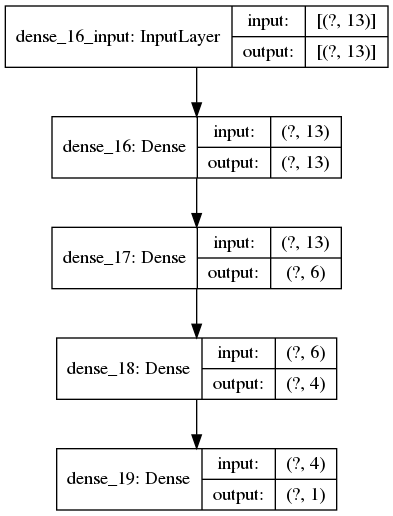

In [82]:

plot_model(model, to_file='model.png',show_shapes=True)

Evaluacion

In [83]:
x_val = x_train[300:,]
y_val = y_train[300:,]

In [84]:
x_val.shape

(104, 13)

In [85]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
13/13 [==============================] - 0s 11ms/step - loss: 590.1922 - mean_absolute_percentage_error: 99.9450 - val_loss: 536.1230 - val_mean_absolute_percentage_error: 99.8523
Epoch 2/5
13/13 [==============================] - 0s 3ms/step - loss: 588.3447 - mean_absolute_percentage_error: 99.7169 - val_loss: 533.1307 - val_mean_absolute_percentage_error: 99.4441
Epoch 3/5
13/13 [==============================] - 0s 3ms/step - loss: 582.9238 - mean_absolute_percentage_error: 99.0263 - val_loss: 523.9247 - val_mean_absolute_percentage_error: 98.1827
Epoch 4/5
13/13 [==============================] - 0s 3ms/step - loss: 565.9188 - mean_absolute_percentage_error: 96.9213 - val_loss: 496.6003 - val_mean_absolute_percentage_error: 94.3250
Epoch 5/5
13/13 [==============================] - 0s 3ms/step - loss: 522.3190 - mean_absolute_percentage_error: 90.9059 - val_loss: 433.0498 - val_mean_absolute_percentage_error: 84.7052


In [86]:
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 429.8425 - mean_absolute_percentage_error: 78.1766 - val_loss: 318.6795 - val_mean_absolute_percentage_error: 66.3391
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 287.0955 - mean_absolute_percentage_error: 57.2330 - val_loss: 178.6197 - val_mean_absolute_percentage_error: 45.3231
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 162.4383 - mean_absolute_percentage_error: 44.5146 - val_loss: 118.7792 - val_mean_absolute_percentage_error: 46.8438
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 129.2014 - mean_absolute_percentage_error: 49.1296 - val_loss: 122.6410 - val_mean_absolute_percentage_error: 51.4308
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 126.7325 - mean_absolute_percentage_error: 49.4099 - val_loss: 114.0397 - val_mean_absolute_percentage_error: 47.3969
Epoch 6/100
13/13 [==========================

In [87]:
resultado = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 46.5001 - mean_absolute_percentage_error: 21.4929


In [88]:
resultado

[46.50014877319336, 21.49292755126953]